In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install -q keras

In [3]:
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import cv2
import os
%matplotlib inline

In [4]:
base_dir='/content/drive/MyDrive/DATASET/chest_xray'
train_pneumonia=os.listdir('/content/drive/MyDrive/DATASET/chest_xray/train/PNEUMONIA')
train_normal=os.listdir('/content/drive/MyDrive/DATASET/chest_xray/train/NORMAL')
val_dir_normal=os.listdir('/content/drive/MyDrive/DATASET/chest_xray/val/NORMAL')
test_dir_normal=os.listdir('/content/drive/MyDrive/DATASET/chest_xray/test/NORMAL')
val_dir_pneumonia=os.listdir('/content/drive/MyDrive/DATASET/chest_xray/val/PNEUMONIA')
test_dir_pneumonia=os.listdir('/content/drive/MyDrive/DATASET/chest_xray/test/PNEUMONIA')

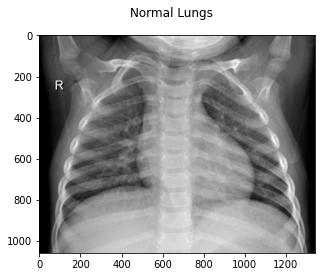

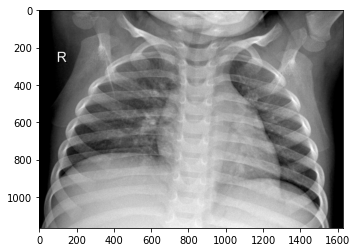

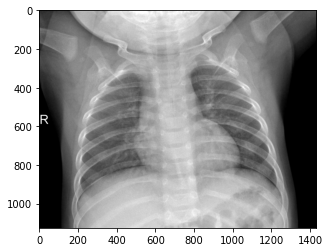

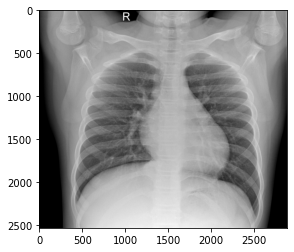

In [5]:
from keras.preprocessing.image import ImageDataGenerator, load_img
plt.suptitle('Normal Lungs')
for i in range(0,4):
    img = train_normal[i]
    img = load_img('/content/drive/MyDrive/DATASET/chest_xray/train/NORMAL/' + img)
    plt.imshow(img)
    plt.show()

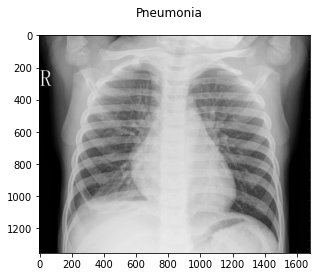

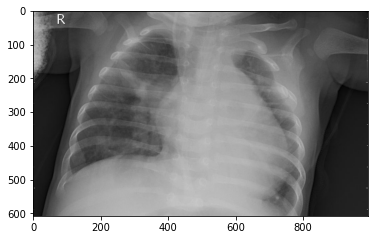

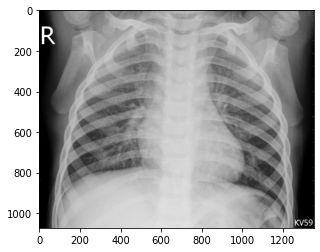

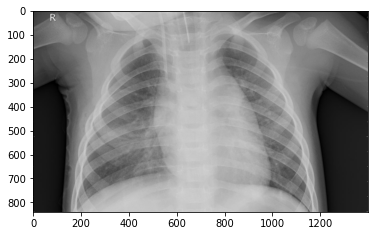

In [6]:
from keras.preprocessing.image import ImageDataGenerator, load_img
plt.suptitle('Pneumonia')
for i in range(0,4):
    img = train_pneumonia[i]
    img = load_img('/content/drive/MyDrive/DATASET/chest_xray/train/PNEUMONIA/' + img)
    plt.imshow(img)
    plt.show()

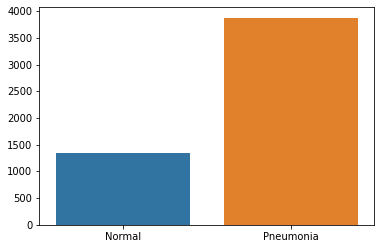

In [7]:
sns.barplot(x=['Normal','Pneumonia'],y=[len(train_normal),len(train_pneumonia)])

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import regularizers

In [9]:
#Data Preprocessing
train_datagen = ImageDataGenerator(    rescale=1/255.,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        rotation_range=0.4,
                                        zoom_range=0.4
                                                                       )

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/chest_xray/train',
                                                 target_size=(224, 224),
                                                 batch_size=8,
                                                 class_mode='binary')

val_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/chest_xray/val',
                                            target_size=(224, 224),
                                            batch_size=8,
                                            shuffle=True,
                                            class_mode='binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/chest_xray/test',
                                            target_size=(224, 224),
                                            batch_size=8,
                                            class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
from keras.callbacks import ReduceLROnPlateau
RLR = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.1,
                                         patience=3,
                                         cooldown=3,
                                         min_lr=0.01,
                                        verbose=1)

callbacks = [RLR]

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import optimizers
from keras import backend as K
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))


In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(training_set,
                    steps_per_epoch=5216//8,
                    epochs=30,
                    validation_data=test_set,
                    validation_steps=624//8,
                    callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
652/652 [==============================] - 1830s 3s/step - loss: 0.8239 - accuracy: 0.7542 - val_loss: 0.6189 - val_accuracy: 0.7853
Epoch 2/30
652/652 [==============================] - 116s 177ms/step - loss: 0.4868 - accuracy: 0.8472 - val_loss: 0.7937 - val_accuracy: 0.7564
Epoch 3/30
652/652 [==============================] - 116s 177ms/step - loss: 0.4196 - accuracy: 0.8658 - val_loss: 0.4887 - val_accuracy: 0.8429
Epoch 4/30
652/652 [==============================] - 116s 177ms/step - loss: 0.3829 - accuracy: 0.8714 - val_loss: 0.4609 - val_accuracy: 0.8686
Epoch 5/30
652/652 [==============================] - 115s 177ms/step - loss: 0.3731 - accuracy: 0.8833 - val_loss: 0.5486 - val_accuracy: 0.8574
Epoch 6/30
652/652 [==============================] - 116s 178ms/step - loss: 0.3752 - accuracy: 0.8848 - val_loss: 0.5321 - val_accuracy: 0.8317
Epoch 7/30
652/652 [==============================] - 118s 180ms/step - loss: 0.3369 - accuracy: 0.9021 - val_loss: 0.5599 - v